# Introduction
At this experiment we do cross-validation for model initialized and learned on 2020-01-02 day data and test it on other 5 days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import load
import os 
os.chdir('../..')

In [2]:
similarity = 90
height, width = 10, 6
periods = range(5, 11)

Qmatrix_init = load(open(f'src/SPY_patterns_scanner/output/90/6x10/cross_valid/Q_matrix_win5_10_cv.pkl', 'rb'))

pl_cols = [col for col in Qmatrix_init.columns if 'pl' in col]

buy_cols = [col for col in Qmatrix_init.columns if 'buy' in col]
hold_cols = [col for col in Qmatrix_init.columns if 'hold' in col]
sell_cols = [col for col in Qmatrix_init.columns if 'sell' in col]

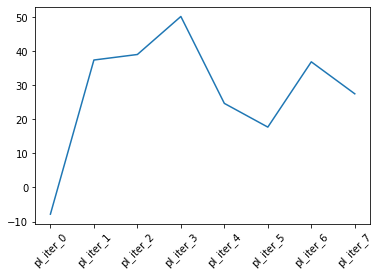

In [3]:
Qmatrix_init[pl_cols].sum().plot(rot=45);

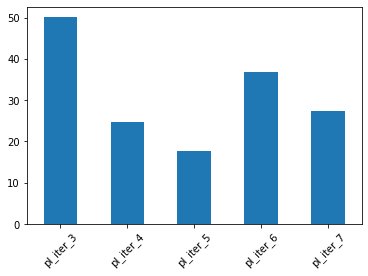

In [4]:
pl_cols_test = pl_cols[3:]
Qmatrix_init[pl_cols_test].sum().plot.bar(x=pl_cols_test, rot=45);

In [5]:
Qmatrix_init[pl_cols].sum()

pl_iter_0    -7.84
pl_iter_1    37.37
pl_iter_2    38.99
pl_iter_3    50.14
pl_iter_4    24.65
pl_iter_5    17.69
pl_iter_6    36.84
pl_iter_7    27.46
dtype: float64

In [6]:
Qmatrix_init[pl_cols].sum().max()

50.139999999997144

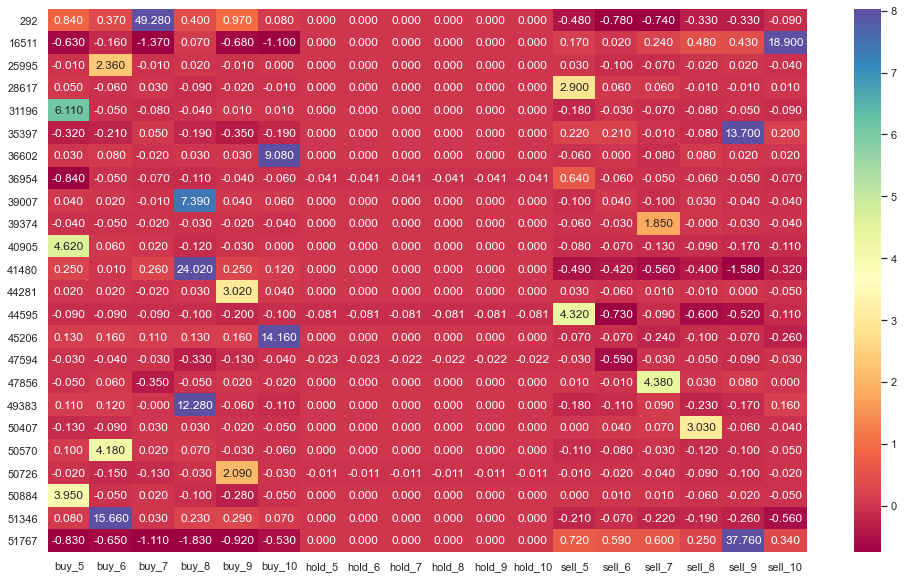

In [7]:
sns.set(rc={'figure.figsize':(17,10)})
sns.heatmap(Qmatrix_init[buy_cols + hold_cols + sell_cols], annot=True, cmap="Spectral", fmt='.3f', robust=True);

In [8]:
pl = []
for i in range(1, 6):
    Qmatrix = load(open(f'src/SPY_patterns_scanner/output/90/5x10/initialized_matrices/Q_matrix_win5_10_{i}.pkl', 'rb'))
    pl.append(Qmatrix['pl_iter_2'].sum())
# pd.Series(pl).plot.bar(x=pl_cols_test, rot=45);

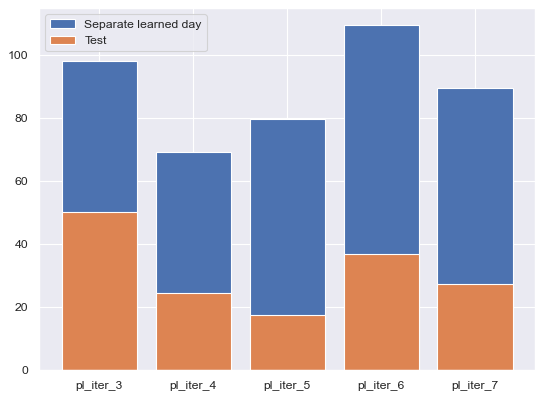

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(height=pd.Series(pl), x=pl_cols_test)
plt.bar(height=Qmatrix_init[pl_cols_test].sum(), x=pl_cols_test)
plt.legend(['Separate learned day', 'Test'])
plt.show()

### PL for every pattern

In [12]:
pd.concat([Qmatrix_init[pl_cols_test].sum(axis=1), Qmatrix_init['prototype']], axis=1)

,0,prototype
292,29.84,5
16511,8.72,6
25995,1.69,7
28617,1.90,8
31196,4.10,9
35397,8.10,18
36602,8.06,19
36954,-0.40,20
39007,6.66,21
39374,1.10,22


# Conclusion
As you can see on figure the model brings profit on every test. It is strange that the patterns that bring the maximum profit look like a wave and do not have a clear trend. To test it, we will create patterns of 6 prices and evaluate their forecast.